**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Miguel Armando Fonllem Salazar
*   MATRÍCULA: A00826812

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/Actividad 4"
os.chdir(DIR)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64']).shape[1]
cat_cols = df.select_dtypes(include=['object', 'category']).shape[1]

print(f"Columnas numéricas: {num_cols}")
print(f"Columnas cualitativas: {cat_cols}")

Columnas numéricas: 8
Columnas cualitativas: 4


 2. Determina el porcentaje de valores faltantes por columna.

In [11]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [12]:
# Estadísticas descriptivas generales
stats = df.describe()

# Calcular asimetría y curtosis
skewness = df[['person_age', 'loan_int_rate']].skew()
kurtosis = df[['person_age', 'loan_int_rate']].kurtosis()

# Mostrar resultados
print("### Estadísticas Descriptivas ###")
print(stats)

print("\n### Asimetría ###")
print(skewness)

print("\n### Curtosis ###")
print(kurtosis)

# Clasificación según los valores de asimetría y curtosis
def classify_distribution(skewness, kurtosis):
    skew_class = "Simétrica" if abs(skewness) < 0.5 else "Sesgada"
    if kurtosis < 3:
        kurt_class = "Platicúrtica (colas cortas)"
    elif kurtosis == 3:
        kurt_class = "Mesocúrtica (normal)"
    else:
        kurt_class = "Leptocúrtica (colas largas)"
    return skew_class, kurt_class

person_age_class = classify_distribution(skewness['person_age'], kurtosis['person_age'])
loan_int_rate_class = classify_distribution(skewness['loan_int_rate'], kurtosis['loan_int_rate'])

print(f"\nClasificación de person_age: Asimetría - {person_age_class[0]}, Curtosis - {person_age_class[1]}")
print(f"Clasificación de loan_int_rate: Asimetría - {loan_int_rate_class[0]}, Curtosis - {loan_int_rate_class[1]}")


### Estadísticas Descriptivas ###
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

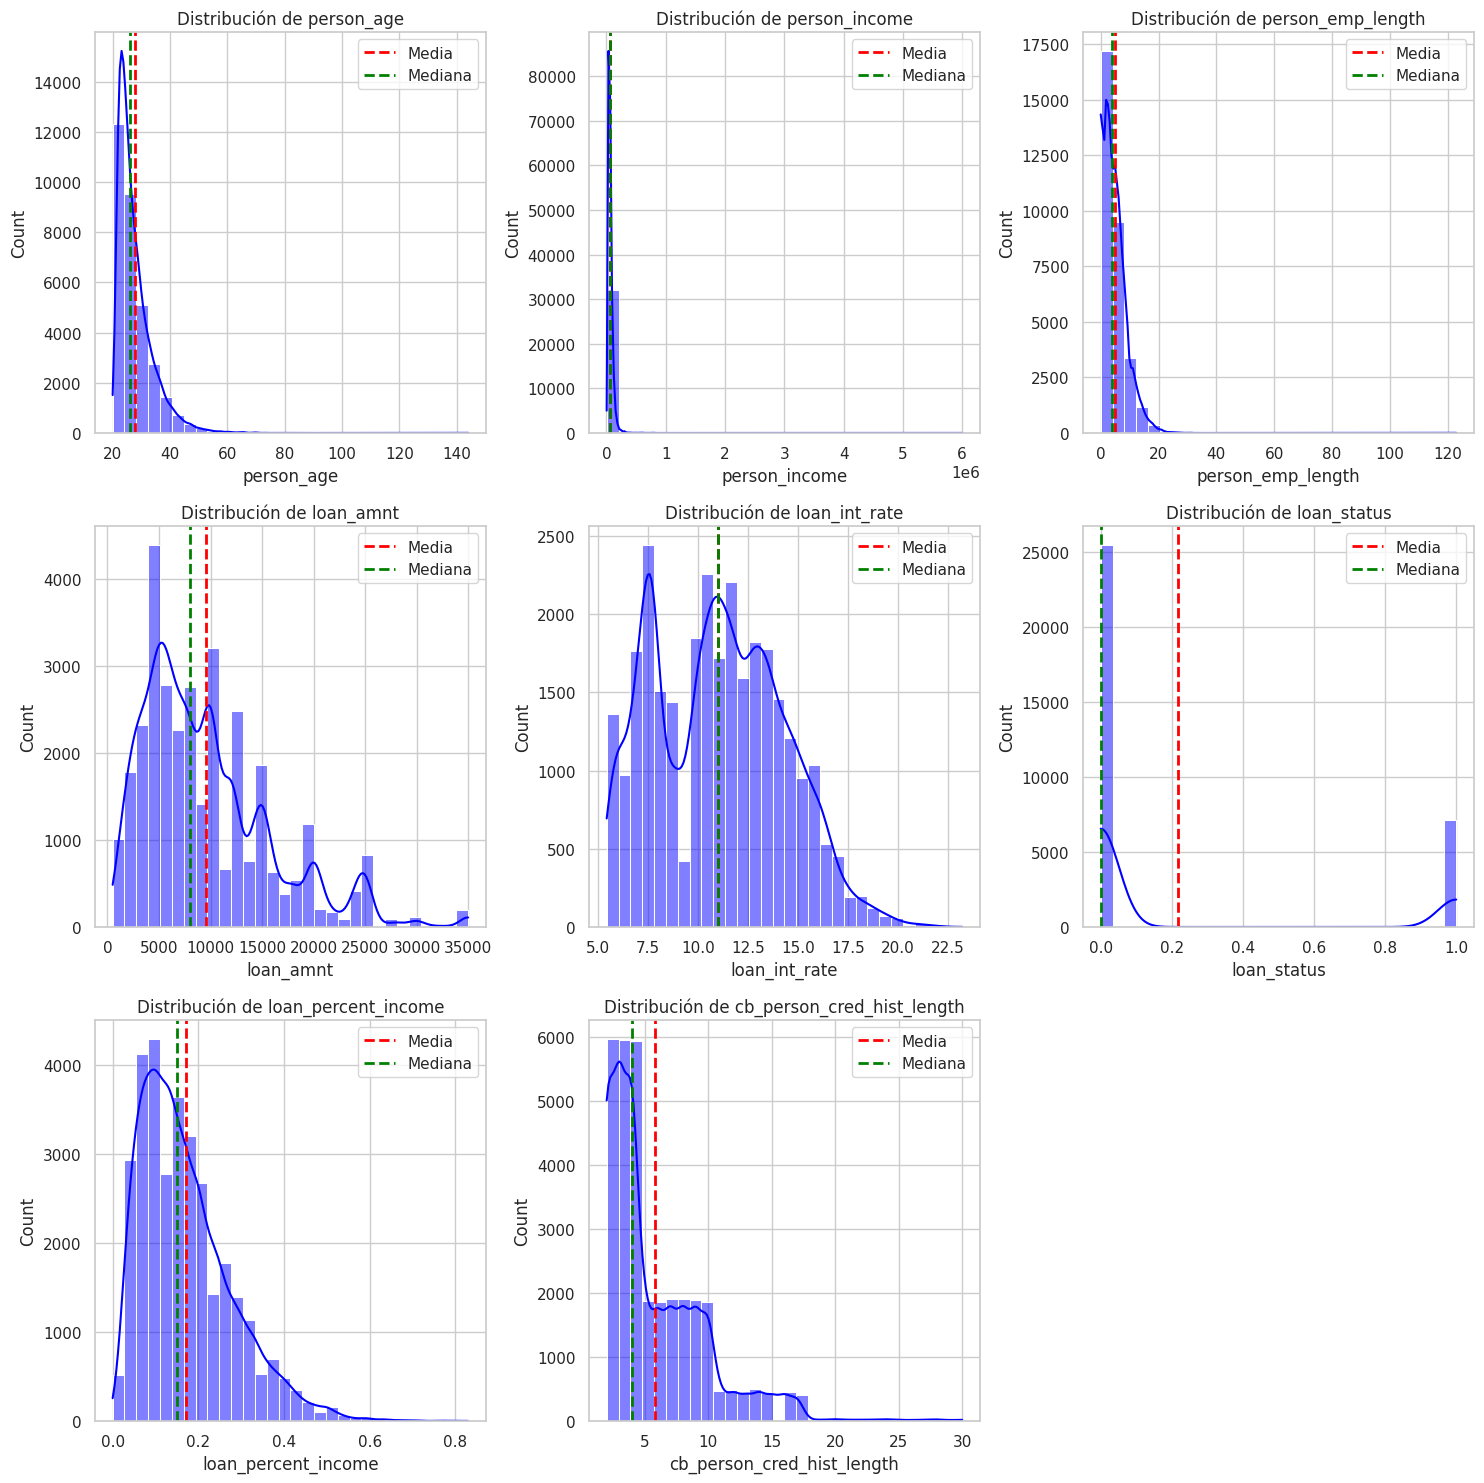

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Definir el tamaño de la figura
num_vars = df.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(num_vars)

plt.figure(figsize=(15, 5 * (num_plots // 3 + 1)))

# Crear histogramas y gráficos KDE
for i, col in enumerate(num_vars, 1):
    plt.subplot((num_plots // 3) + 1, 3, i)  # Organiza los gráficos en filas de 3 columnas
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label="Media")
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2, label="Mediana")
    plt.title(f'Distribución de {col}')
    plt.legend()

plt.tight_layout()
plt.show()


5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

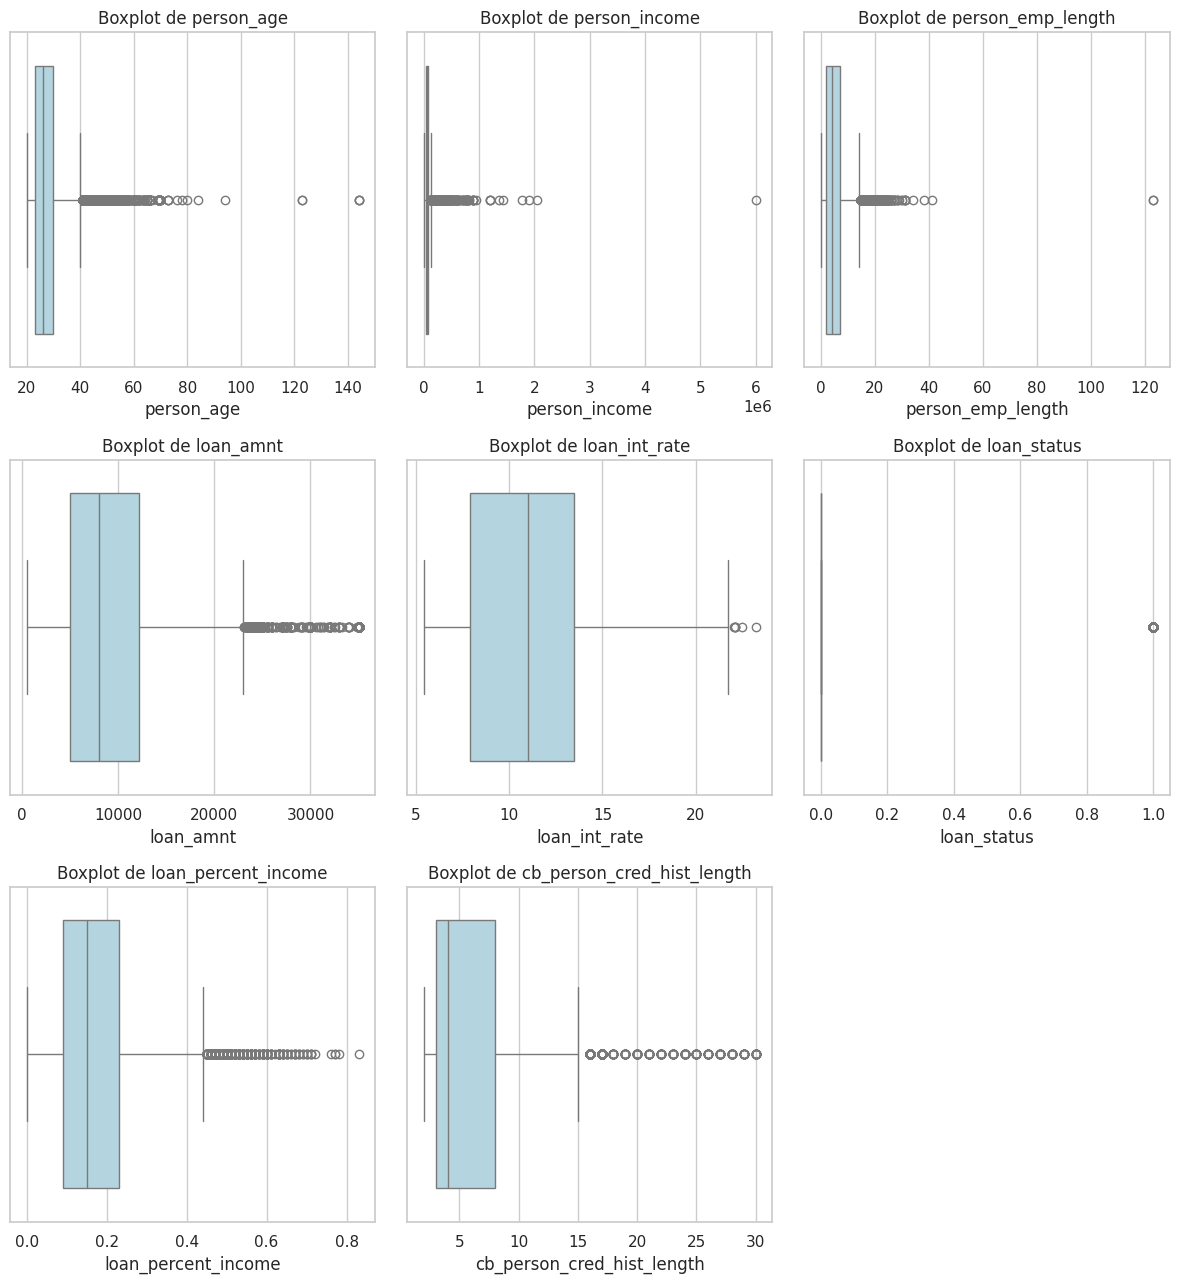

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Seleccionar las columnas numéricas
num_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Definir el tamaño de la figura
plt.figure(figsize=(12, 5 * len(num_vars) // 3))

# Crear un boxplot para cada variable numérica
for i, col in enumerate(num_vars, 1):
    plt.subplot((len(num_vars) // 3) + 1, 3, i)  # Organiza los gráficos en filas de 3 columnas
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [16]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [17]:
# Obtener estadísticas descriptivas de las variables categóricas
text_stats = df.describe(include='object')

# Calcular la moda de cada variable categórica
mode_values = df.select_dtypes(include='object').mode().iloc[0]

# Calcular la cardinalidad (cantidad de valores únicos)
cardinality = df.select_dtypes(include='object').nunique()

# Calcular recuentos únicos para cada valor de cada columna categórica
value_counts = {col: df[col].value_counts() for col in df.select_dtypes(include='object').columns}

# Mostrar resultados
print("### Estadísticas Descriptivas de Variables Categóricas ###")
print(text_stats)

print("\n### Moda de cada variable categórica ###")
print(mode_values)

print("\n### Cardinalidad (cantidad de valores únicos) ###")
print(cardinality)

print("\n### Recuentos únicos ###")
for col, counts in value_counts.items():
    print(f"\nValores únicos en {col}:")
    print(counts)


### Estadísticas Descriptivas de Variables Categóricas ###
       person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836

### Moda de cada variable categórica ###
person_home_ownership             RENT
loan_intent                  EDUCATION
loan_grade                           A
cb_person_default_on_file            N
Name: 0, dtype: object

### Cardinalidad (cantidad de valores únicos) ###
person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

### Recuentos únicos ###

Valores únicos en person_home_ownership:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          258

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

<ipython-input-18-e7b673c4390a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis", order=df[col].value_counts().index)
<ipython-input-18-e7b673c4390a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis", order=df[col].value_counts().index)
<ipython-input-18-e7b673c4390a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis", order=df[col].value_counts().index)
<ipython-input-18-e7b673c4390a>:16: FutureWarning: 

Passing `palette` without ass

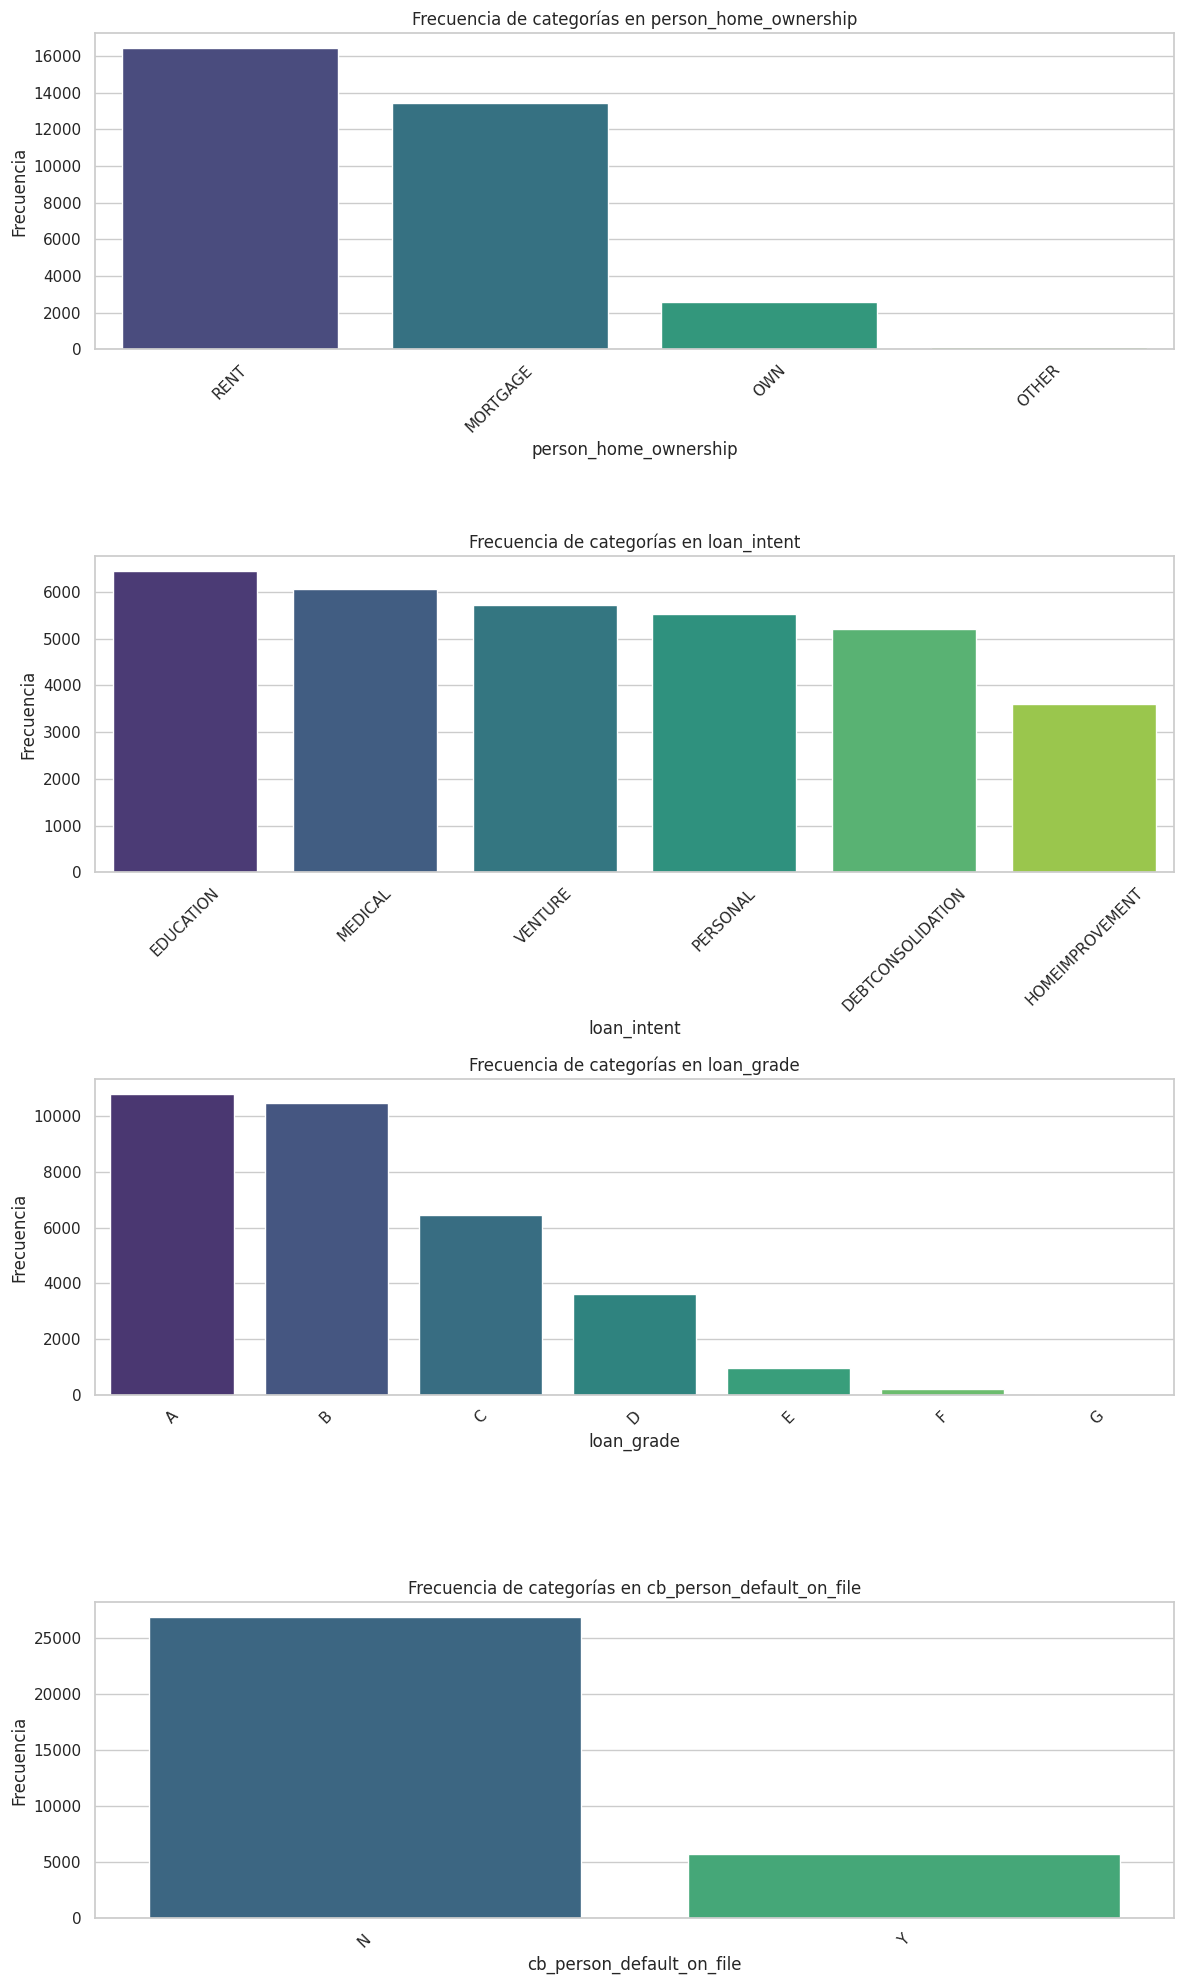

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Seleccionar variables categóricas
cat_vars = df.select_dtypes(include='object').columns

# Definir el tamaño de la figura
plt.figure(figsize=(12, 5 * len(cat_vars)))

# Crear un gráfico de barras para cada variable categórica
for i, col in enumerate(cat_vars, 1):
    plt.subplot(len(cat_vars), 1, i)  # Organiza los gráficos en una columna
    sns.countplot(x=col, data=df, palette="viridis", order=df[col].value_counts().index)
    plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas categorías
    plt.title(f'Frecuencia de categorías en {col}')
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

<ipython-input-19-fcb2f8152058>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_percent_income', data=df, palette="viridis")


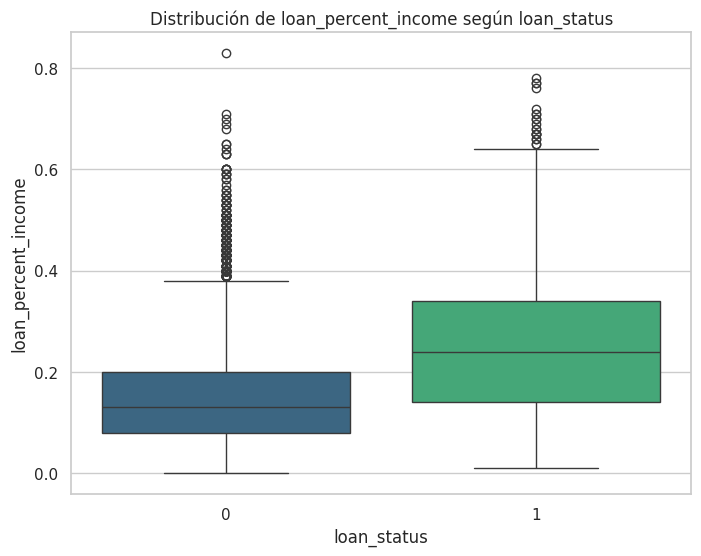

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el boxplot de loan_percent_income según loan_status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df, palette="viridis")

# Título y etiquetas
plt.title('Distribución de loan_percent_income según loan_status')
plt.xlabel('loan_status')
plt.ylabel('loan_percent_income')

# Mostrar gráfico
plt.show()


 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

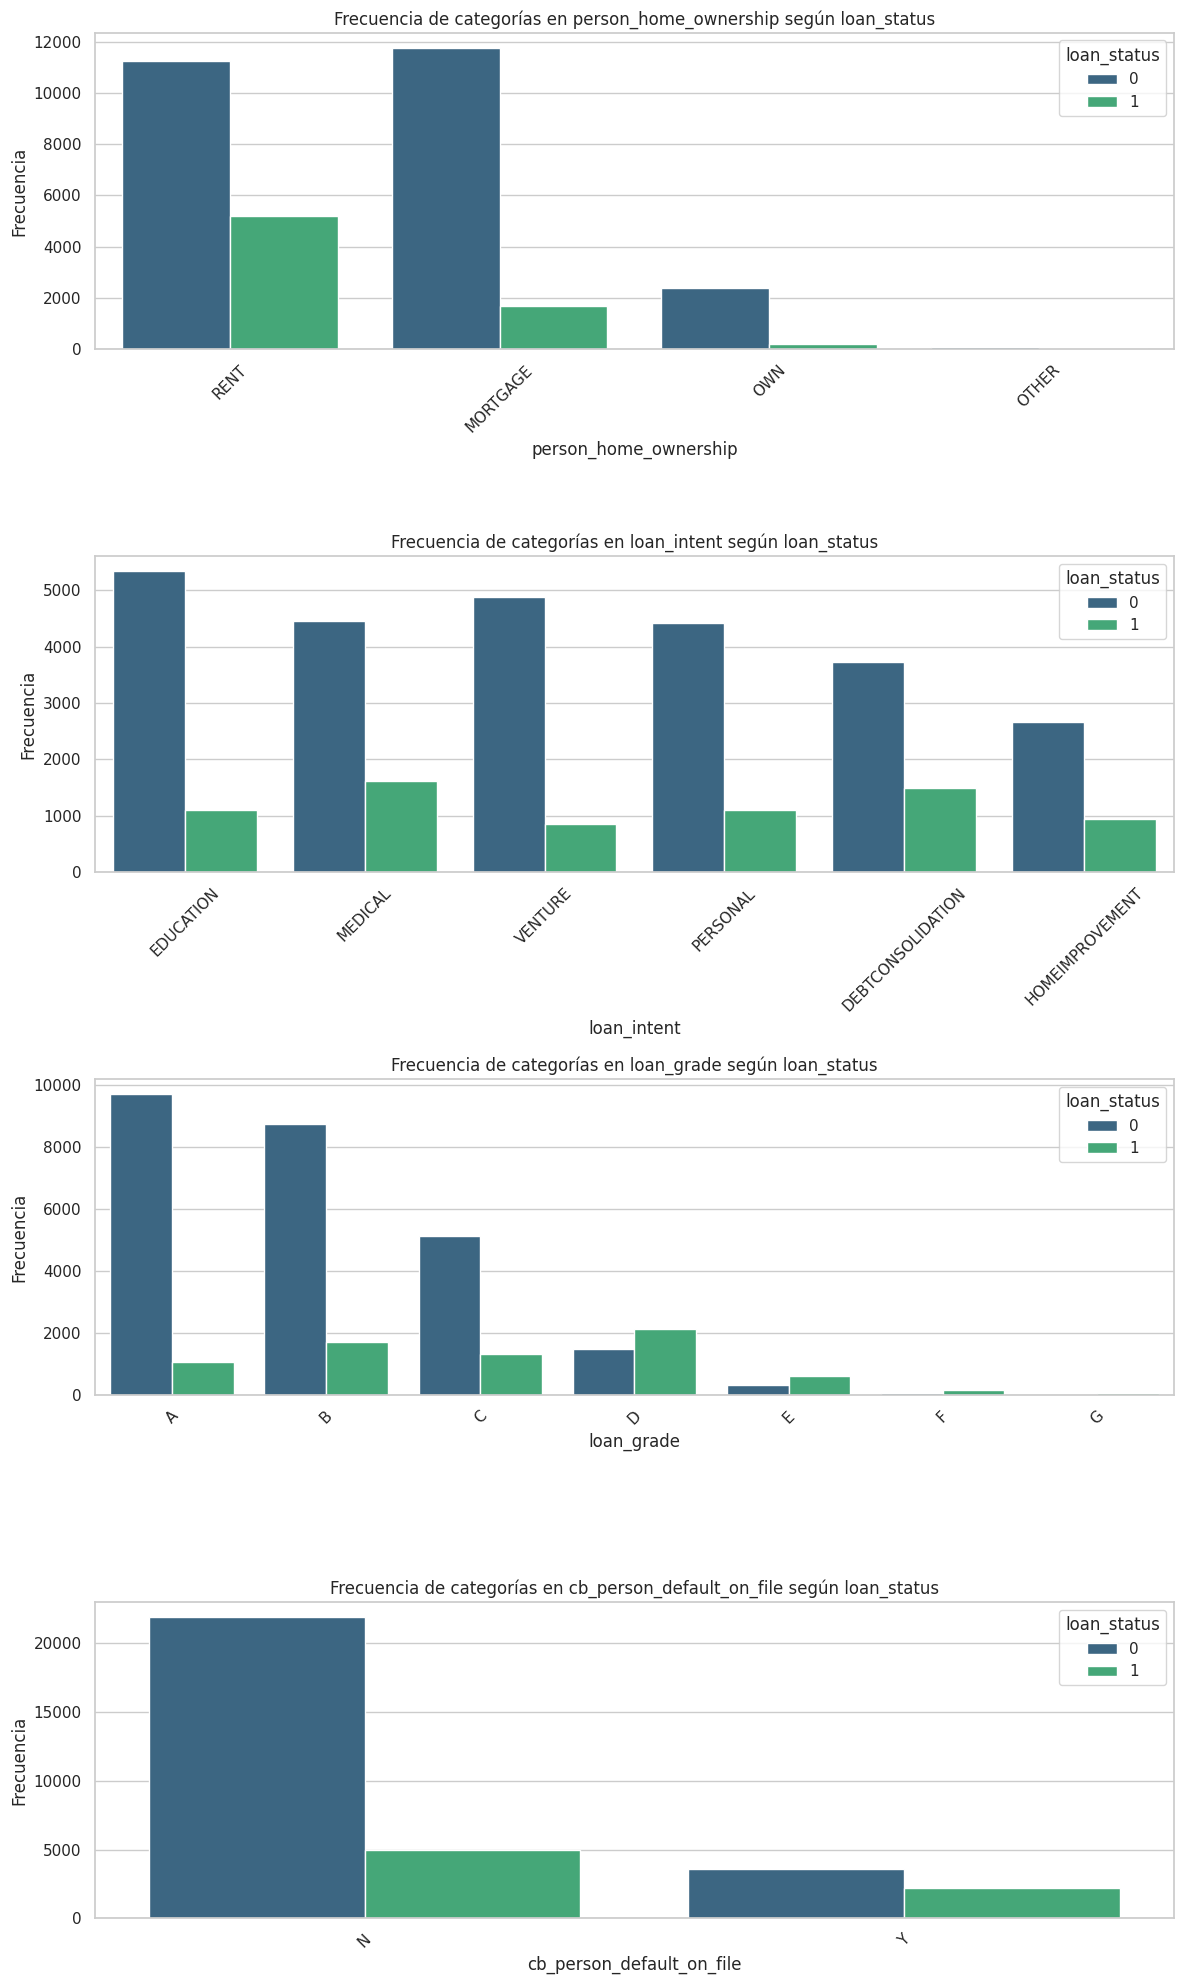

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Seleccionar variables categóricas
cat_vars = df.select_dtypes(include='object').columns

# Definir el tamaño de la figura
plt.figure(figsize=(12, 5 * len(cat_vars)))

# Crear un gráfico de barras para cada variable categórica, separado por loan_status
for i, col in enumerate(cat_vars, 1):
    if col != 'loan_status':  # No incluir loan_status en los gráficos
        plt.subplot(len(cat_vars), 1, i)  # Organiza los gráficos en una columna
        sns.countplot(x=col, hue='loan_status', data=df, palette="viridis", order=df[col].value_counts().index)
        plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas categorías
        plt.title(f'Frecuencia de categorías en {col} según loan_status')
        plt.xlabel(col)
        plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

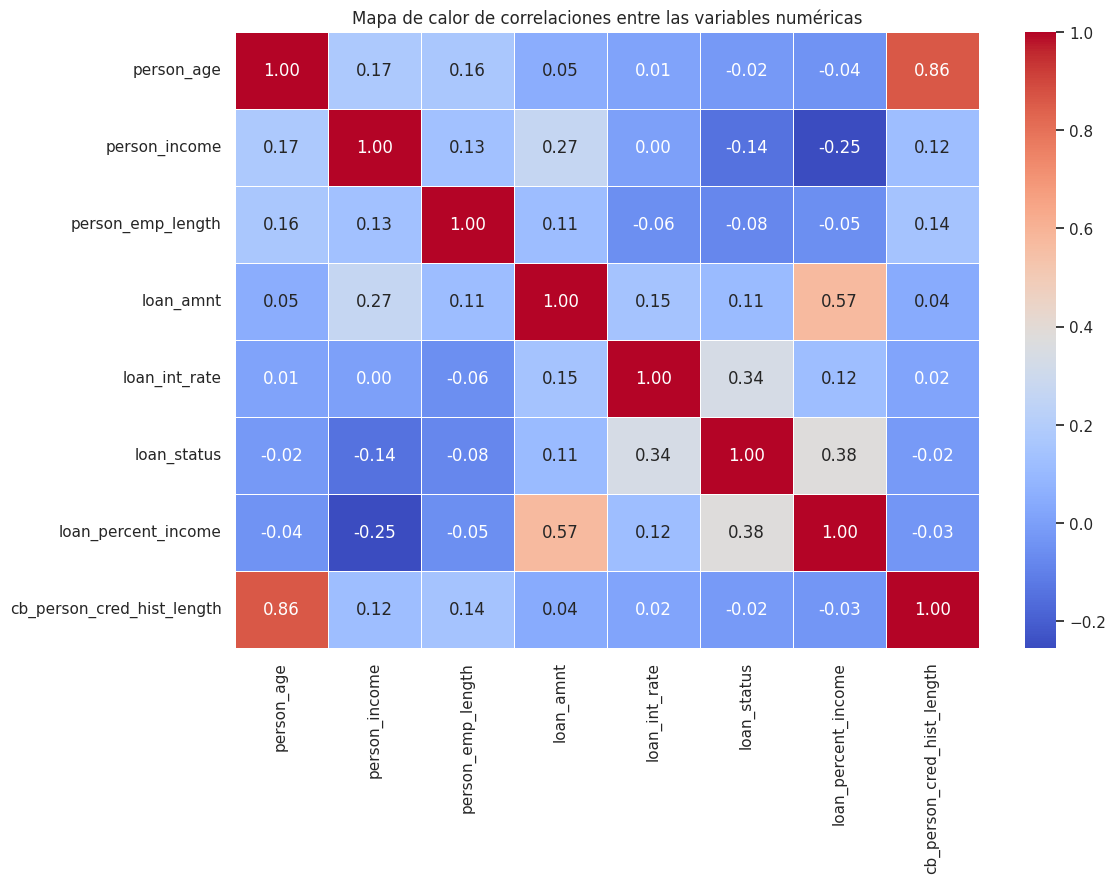

La variable con mayor correlación con loan_status es loan_status con una correlación de 1.00


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación solo para variables numéricas
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Título y mostrar gráfico
plt.title('Mapa de calor de correlaciones entre las variables numéricas')
plt.show()

# Identificar la variable con mayor correlación con loan_status
corr_with_loan_status = corr_matrix['loan_status'].dropna()  # Eliminar NaN si es necesario
max_corr_var = corr_with_loan_status.abs().idxmax()  # Obtener la variable con mayor correlación absoluta
max_corr_value = corr_with_loan_status[max_corr_var]  # Valor de la correlación

print(f"La variable con mayor correlación con loan_status es {max_corr_var} con una correlación de {max_corr_value:.2f}")
